In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

### Part 1: Data Exploration and Visualization

### Q1. Load the dataset lifesat.csv and display the first 5 rows.

In [33]:
# Note: Please make sure 'lifesat.csv' is in the same directory
path = 'lifesat.csv'
df = pd.read_csv(path)
df.head()

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


### Q2. Print basic info and summary statistics.

In [34]:
print("--- Basic Info ---")
df.info()
print("\n--- Summary Statistics ---")
df.describe()

--- Basic Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               27 non-null     object 
 1   GDP per capita (USD)  27 non-null     float64
 2   Life satisfaction     27 non-null     float64
dtypes: float64(2), object(1)
memory usage: 780.0+ bytes

--- Summary Statistics ---


,GDP per capita (USD),Life satisfaction
count,27.000000,27.000000
mean,41564.521771,6.566667
std,9631.452319,0.765607
min,26456.387938,5.400000
25%,33938.289305,5.900000
50%,41627.129269,6.800000
75%,49690.580269,7.300000
max,60235.728492,7.600000


### Q3. Display a scatter plot for GDP per capita vs Life Satisfaction. Add labels, title, and discuss the observed relationship.

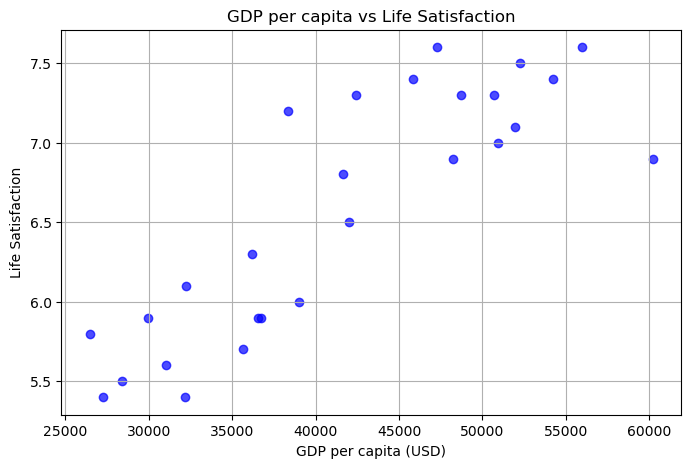

In [35]:
# Note: If your CSV has a different exact capitalization for columns (e.g., 'Life satisfaction'), adjust it below.
plt.figure(figsize=(8, 5))
plt.scatter(df['GDP per capita (USD)'], df['Life satisfaction'], color='blue', alpha=0.7)
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life Satisfaction')
plt.title('GDP per capita vs Life Satisfaction')
plt.grid(True)
plt.show()

**Discuss the observed relationship:**
The scatter plot illustrates a positive, somewhat linear correlation between GDP per capita and life satisfaction. Generally, as a country's GDP per capita increases, the life satisfaction of its citizens also tends to increase.

### Part 2: Linear Regression Model

### Q4. Extract input (X) and target (y). Print their shapes.

In [36]:
# X must be a 2D array for Scikit-Learn
X = df[['GDP per capita (USD)']].values
y = df['Life satisfaction'].values

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (27, 1)
Shape of y: (27,)


### Q5. Train a Linear Regression model & Display coefficient and intercept.

In [37]:
lin_model = LinearRegression()
lin_model.fit(X, y)

print("Coefficient (θ1):", lin_model.coef_[0])
print("Intercept (θ0):", lin_model.intercept_)

Coefficient (θ1): 6.778899694341219e-05
Intercept (θ0): 3.74904942737691


### Q6. Plot the predicted regression line from the model along with a scatter plot of the data.

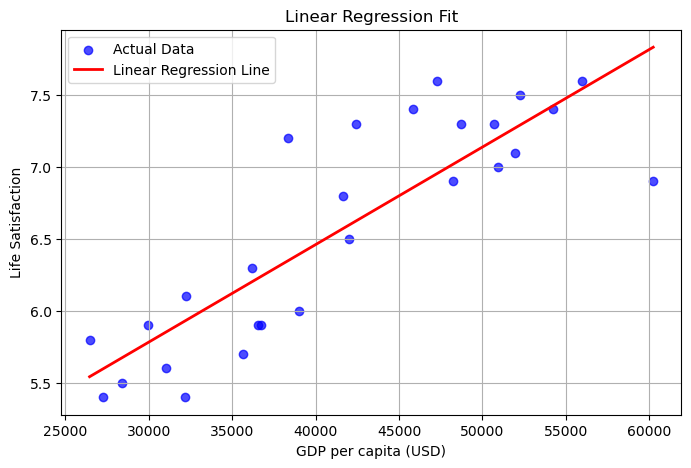

In [38]:
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', alpha=0.7, label='Actual Data')
plt.plot(X, lin_model.predict(X), color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life Satisfaction')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True)
plt.show()

### Q7. Predict Life Satisfaction for GDP = 37,655.2 USD. Comment on result.

In [39]:
X_new = [[37655.2]]
predicted_life_sat = lin_model.predict(X_new)
print("Predicted Life Satisfaction for GDP=$37,655.2:", predicted_life_sat[0])

Predicted Life Satisfaction for GDP=$37,655.2: 6.3016576650804845


**Comment on result:**
The linear regression model calculates this prediction strictly based on the overall linear trend line mathematically fitted to the dataset (multiplying the GDP by the learned coefficient and adding the intercept).

### Part 3: K-Nearest Neighbors Regression

### Q8. Train a KNeighbors Regressor (n_neighbors = 3).

In [40]:
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X, y)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### Q9. Predict Life Satisfaction for GDP = 37,655.2 USD and compare with Linear Regression.

In [41]:
knn_prediction = knn_model.predict(X_new)
print("KNN (k=3) Predicted Life Satisfaction:", knn_prediction[0])
print("Linear Regression Prediction (from Q7):", predicted_life_sat[0])

KNN (k=3) Predicted Life Satisfaction: 6.333333333333333
Linear Regression Prediction (from Q7): 6.3016576650804845


**Compare with Linear Regression:**
Unlike Linear Regression, which assumes a global continuous trend line, the KNN Regressor estimates the life satisfaction by averaging the values of the 3 countries in the dataset that have the closest GDP per capita to $37,655.2. This results in slightly different predictions.

### Q10. Use n_neighbors 1, 3, 5, and 10 and print the predicted values of life satisfaction. Plot the results using a line plot.

Prediction for k=1: 7.2
Prediction for k=3: 6.333333333333333
Prediction for k=5: 6.26
Prediction for k=10: 6.369999999999999


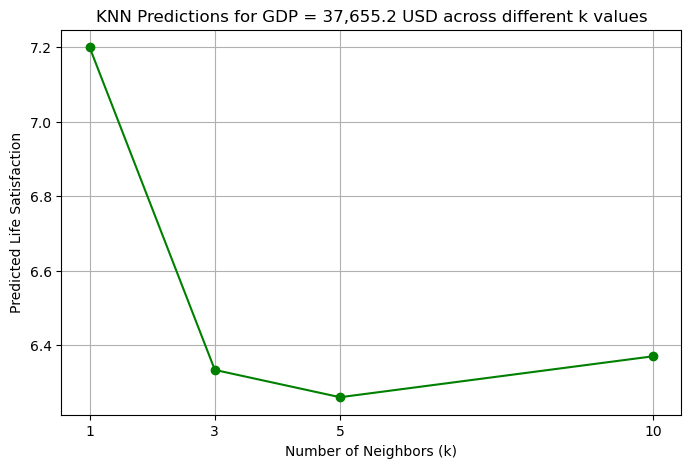

In [42]:
k_values = [1, 3, 5, 10]
predictions = []

for k in k_values:
    temp_knn = KNeighborsRegressor(n_neighbors=k)
    temp_knn.fit(X, y)
    pred = temp_knn.predict(X_new)[0]
    predictions.append(pred)
    print(f"Prediction for k={k}: {pred}")

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(k_values, predictions, marker='o', linestyle='-', color='green')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Predicted Life Satisfaction')
plt.title('KNN Predictions for GDP = 37,655.2 USD across different k values')
plt.xticks(k_values)
plt.grid(True)
plt.show()